<h1>Linear Regression:</h1>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

<p>1. Generate 2000 data points with one dimensional feature randomly sampled. For each data point attribute a real number representing its target value.</p>


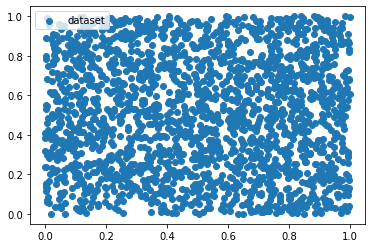

In [ ]:
n_samples = 2000
#generating the random values for each variable
X = np.random.rand(n_samples,1)
Y = np.random.rand(n_samples,1)
x = np.hstack((np.ones(X.shape),X))

# plotting the dataset points 
plt.scatter(X,Y,label='dataset')
plt.legend()

<p>2. Fit a line using the data points and their target values using two different methods</p>


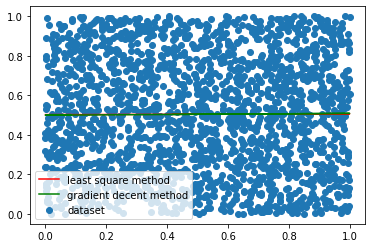

In [ ]:
# first method least square

lqm=np.linalg.inv(x.T.dot(x)).dot(x.T.dot(Y))
plt.plot(X,x.dot(lqm),color='red',label='least square method')

# second method  gradient decent
rate=0.2
teta = np.random.rand(2,1)
for i in range(0, 100):
 teta = teta - rate * (1/n_samples * x.T.dot((x.dot(teta) - Y)))

#plotting the results 
plt.scatter(X,Y,label='dataset')
plt.plot(X,x.dot(teta),color='green',label='gradient decent method')
plt.legend()

<p>3. Add 20 outlier data points randomly distributed, set them and their target values far away from the original data point</p>


(2020, 1)


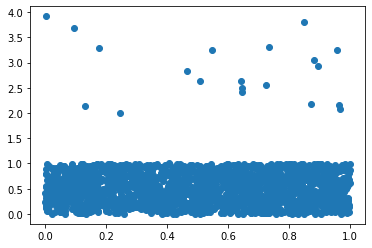

In [ ]:
#adding the outliers for X and Y
n_outliers = 20
X_outlier = np.append(X,np.random.rand(n_outliers,1),axis=0)
Y_outlier = np.append(Y,np.random.uniform(low=2 ,high=4, size=(n_outliers,1)), axis=0)
xx =np.hstack((np.ones(X_outlier.shape),X_outlier))
#plotting the results 
plt.scatter(X_outlier,Y_outlier)

<p>4. Fit a line using all data points using one of the proposed two methods. What do you observe?</p>


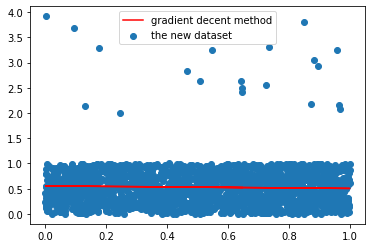

In [ ]:
#applying the gradient decent method 
learnrate=0.2
the = np.random.randn(2, 1)
for i in range(0, 170):
  #calculating the mean square error
 MeanSquareError= 1/n_samples * xx.T.dot((xx.dot(the) - Y_outlier))
 the = the - (learnrate * MeanSquareError)
#plotting the results 
plt.scatter(X_outlier,Y_outlier)
plt.plot(X_outlier,xx.dot(the),color='red',label='gradient decent method')
plt.legend()

when we apply the  gradient decent on the first dataset we have a better result but when we added the outliers we have a lot of errors and misclassified points especially the outlier data points.

<p>5. Add a regularisation to the proposed method, use the sum of the square of coefficients. What do you observe?</p>


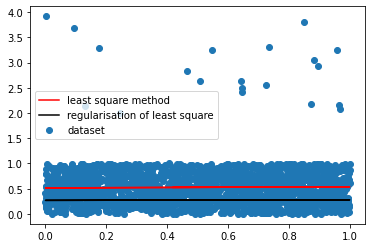

In [ ]:
# regularisation
# we generate the theta 
lq=np.linalg.inv(xx.T.dot(xx)).dot(xx.T.dot(Y_outlier))
#regularizing the method
regul=np.linalg.inv(2*0.96*xx.T.dot(xx)).dot(xx.T.dot(Y_outlier))
#plotting results of the regularisation
plt.scatter(X_outlier,Y_outlier)
plt.plot(X_outlier,xx.dot(lq),color='red' ,label='least square method')
plt.plot(X_outlier,xx.dot(regul),color='black',label='regularisation of least square')
plt.legend()

<p>6. Fit linear model with RANSAC algorithm</p>

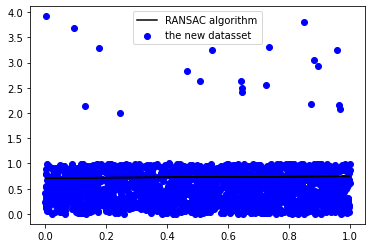

In [ ]:
#applying the RANSAC algorithm on our generated data
#importing the necessary packages 
from sklearn.linear_model import RANSACRegressor
#loading the RANSAC model 
ransac = RANSACRegressor()
# steps to train our model
ransac.fit(X_outlier,Y_outlier)
#diplaying the results of RANSAC algorithm 
plt.scatter(X_outlier, Y_outlier, color='blue')
plt.plot(X_outlier,ransac.predict(X_outlier), color='black', label="RANSAC algorithm")
plt.legend()

<h1>Linear classification</h1>
<p>1. Create an instance of Logistic Regression Classifier and fit the data.</P>


In [ ]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

<p>2. Plot the decision boundary </P>